In [0]:
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

tcmalloc: large alloc 1073750016 bytes == 0x579b0000 @  0x7f672a0822a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


In [0]:
import torch
import numpy as np

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [0]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2018-12-20 07:28:47--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   2.75K  --.-KB/s    in 0s      

2018-12-20 07:28:47 (48.9 MB/s) - ‘helper.py’ saved [2813/2813]



In [0]:
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torchvision import datasets, transforms
import helper
from torch.autograd import Variable
import torch.nn.functional as F
      

In [0]:
#Define a transform to normalize the data
transform=transforms.Compose([transforms.ToTensor(),
                             transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
#Download and load the training data
trainset=datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)
#Download and load the test data
testset=datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True)

Processing...
Done!


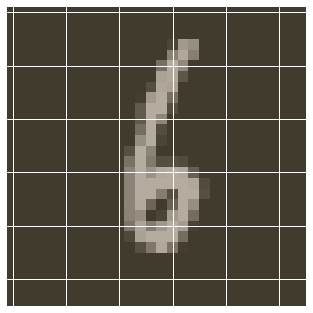

In [0]:
#show an image from the training dataset
images,labels=next(iter(trainloader))
helper.imshow(images[0,:]);


In [0]:
#show the size or dimensions of an image
images.shape

torch.Size([64, 1, 28, 28])

In [0]:
#create your neural network artichecture
class Network(nn.Module):
  
  
  def __init__(self):
    super().__init__()
    self.input=nn.Linear(784,256)
    self.hidden1=nn.Linear(256,100)
    self.hidden2=nn.Linear(100,20)
    self.output=nn.Linear(20,10)
    self.dropout=nn.Dropout(p=0.3)
  #forward function
  def forward(self,x):
    #flatten the inputs
    x=x.view(x.shape[0],-1)
    #pass input x into the neural network
    x=self.dropout(F.relu(self.input(x)))
    x=self.dropout(F.relu(self.hidden1(x)))
    x=self.dropout(F.relu(self.hidden2(x)))
    x=F.log_softmax(self.output(x),dim=1)
    return x
  

In [0]:
 #create a network ,define criterion and optimum
model=Network()
#define the loff function
criterion=nn.CrossEntropyLoss()
#define the gradient function
optimizer=optim.SGD(model.parameters(),lr=0.03)
  

In [0]:
#train the network
epochs=8
steps=0
train_losses=[]
test_losses=[]
for e in range(epochs):
  running_loss=0
  for images,labels in trainloader:
    
    #clear gradient
    optimizer.zero_grad()
    #forwardpass
    output=model(images)
    #get the loss
    loss=criterion(output,labels)
    #backwardpass
    loss.backward()
    optimizer.step()
    
    running_loss+=loss.item()
  else:
    test_loss=0
    accuracy=0
    with torch.no_grad():
      model.eval()
      for images,labels in testloader:
        logits=model(images)
        test_loss+=criterion(logits,labels)
        testOutput=torch.exp(logits)
        top_p,top_class=testOutput.topk(1,dim=1)
        equals=top_class=labels.view(*top_class.shape)
        accuracy+=torch.mean(equals.type(torch.FloatTensor))
    model.train()    
    
    train_losses.append(running_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))
    print("Epoch {}/{}".format(e+1,epochs),
          "training loss: {:.3f}".format(running_loss/len(trainloader)),
          "test loss: {:.3f}".format(test_loss/len(testloader)),
          "accuracy: {:.3f}".format(accuracy/len(testloader)))

    

Epoch 1/8 training loss: 1.231 test loss: 0.420 accuracy: 4.442
Epoch 2/8 training loss: 0.559 test loss: 0.282 accuracy: 4.449
Epoch 3/8 training loss: 0.422 test loss: 0.212 accuracy: 4.441
Epoch 4/8 training loss: 0.353 test loss: 0.174 accuracy: 4.447
Epoch 5/8 training loss: 0.307 test loss: 0.173 accuracy: 4.442
Epoch 6/8 training loss: 0.283 test loss: 0.150 accuracy: 4.441
Epoch 7/8 training loss: 0.257 test loss: 0.128 accuracy: 4.441
Epoch 8/8 training loss: 0.235 test loss: 0.144 accuracy: 4.444


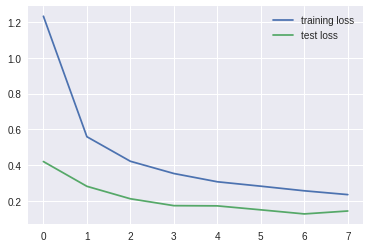

In [0]:
#plot in graph
%matplotlib inline
%config InLineBackend.figure_format='retina'          
import matplotlib.pyplot as plt
plt.plot(train_losses,label='training loss')
plt.plot(test_losses,label='test loss')
plt.legend(frameon=False)
   

torch.Size([1, 10])


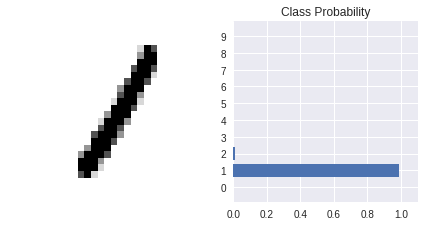

In [0]:
#visualize
%matplotlib inline
%config InLineBackend.figure_format='retina'
dataier=iter(testloader)
images,labels=dataier.next()
img=images[1]
img.shape

ps= torch.exp(model.forward(img))
print(ps.shape)
helper.view_classify(img.view(1,28,28),ps)

